# Visualizing Selected Genes in DR–DL Space and Depletion Curves

This notebook visualizes the provided genes in the DR–DL (um–lam) parameter space and plots their depletion curves using the same plotting settings as `gene_level_clustering.ipynb`.

- DR corresponds to `um`
- DL corresponds to `lam`

Figures are also saved to the results folder for reuse in reports.


In [2]:
"""
Setup and imports.
"""

import logging
from pathlib import Path
from typing import List
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from cycler import cycler

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print("✓ Imports ready")


✓ Imports ready


In [3]:
# Styling copied from gene_level_clustering.ipynb

def setup_plot_style():
    plt.rcParams.update({
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.facecolor': 'white',
        'savefig.dpi': 300,
        'figure.dpi': 100,
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
        'font.size': 10,
        'axes.titlesize': 16,
        'axes.titleweight': 'bold',
        'axes.labelsize': 14,
        'axes.labelweight': 'semibold',
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'axes.linewidth': 2.0,
        'lines.linewidth': 2.0,
        'lines.markersize': 6,
        'patch.linewidth': 2.0,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': True,
        'ytick.right': False,
        'axes.grid': False,
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'axes.axisbelow': True,
        'legend.frameon': True,
        'legend.numpoints': 1,
    })

setup_plot_style()

# Color palette
COLORS = {
    'coral_pink': '#ea6785',
    'forest_green': '#4aa455',
    'bright_blue': '#3b94f2',
    'magenta_purple': '#d06fbd',
    'golden_brown': '#ba8a2d',
    'coral_red': '#ea696f',
    'olive_green': '#6aa042',
    'periwinkle_blue': '#608fee',
    'burnt_orange': '#df7352',
    'sage_green': '#899b32',
    'lavender_blue': '#8b88e8',
    'amber_orange': '#d37e40',
    'mustard_yellow': '#a6932b',
    'orchid_purple': '#ad7cd8'
}

PRIMARY_TRIO = [COLORS['coral_red'], COLORS['olive_green'], COLORS['periwinkle_blue']]
plt.rcParams['axes.prop_cycle'] = cycler(color=PRIMARY_TRIO)

FIGURE_SIZES = {
    'small': (4, 3),
    'medium': (6, 4.5),
    'large': (8, 6),
    'wide': (10, 4),
    'square': (4, 4),
}

print("Styling applied")


Styling applied


In [4]:
# Data loading

data_file = "/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/20_gene_level_clustering/gene_level_clustering_results_kmeans64mergedto7.tsv"
output_folder = Path("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/21_selected_genes_visualization")
output_folder.mkdir(parents=True, exist_ok=True)

logger.info(f"Loading data from {data_file}")
df = pd.read_csv(data_file, sep="\t")
logger.info(f"Data shape: {df.shape}")

# Required columns
required_cols = [
    'Systematic ID', 'Name', 'Status', 'um', 'lam', 'A',
    't0', 't1', 't2', 't3', 't4',
    't0_fitted', 't1_fitted', 't2_fitted', 't3_fitted', 't4_fitted'
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Restrict to successful fits
df = df[df['Status'] == 'Success'].copy()
logger.info(f"Successful fits retained: {len(df)}")


2025-08-13 17:18:20,714 - INFO - Loading data from /data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP/20_gene_level_clustering/gene_level_clustering_results_kmeans64mergedto7.tsv
2025-08-13 17:18:20,739 - INFO - Data shape: (4519, 34)
2025-08-13 17:18:20,743 - INFO - Successful fits retained: 4519


In [38]:
# Gene list provided
selected_genes: List[str] = [
    'cyr1','cap1','git1','pka1','cgs1','pcr1','atf1','cgs2','git3','gpa2','git5','git11','sck1','git7'
]

extra_genes: List[str] = [
    'hsp90',
    'rst2',
    'fbp1'
]

# Match on Name (case-insensitive)
df['Name_lower'] = df['Name'].astype(str).str.strip().str.lower()
sel = df[df['Name_lower'].isin([g.lower() for g in selected_genes+extra_genes])].copy()

# Keep original case for labels
sel['GeneLabel'] = sel['Name']

logger.info(f"Matched {len(sel)} genes out of {len(selected_genes)} requested")
if len(sel) == 0:
    raise ValueError("No genes matched the provided list in column 'Name'")


2025-08-13 19:33:09,290 - INFO - Matched 16 genes out of 14 requested


In [39]:
# Helper: save utility

def save_plot(fig, filename: Path, formats=['png','svg'], dpi=300):
    for fmt in formats:
        fig.savefig(filename.with_suffix(f'.{fmt}'), format=fmt, dpi=dpi,
                    bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"Saved: {', '.join(str(filename.with_suffix('.'+f)) for f in formats)}")


In [40]:
df

,Systematic ID,Name,FYPOviability,RevisedDeletion_essentiality,DeletionLibrary_essentiality,time_points,Status,A,um,lam,...,t2_residual,t3_residual,t4_residual,cluster_kmeans_um_lam,cluster_hierarchical_agg_um_lam,cluster_hierarchical_div_um_lam,cluster_gmm_um_lam,previous_manual_clustering,revised_cluster,Name_lower
0,SPAC1002.02,pom34,viable,V,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.177,-0.021,0.000,...,-0.148,0.000,-0.265,48,56,3,2,15.0,7,pom34
1,SPAC1002.03c,gls2,viable,V,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.253,0.025,0.000,...,-0.164,0.187,-0.089,29,26,3,61,1.0,7,gls2
2,SPAC1002.04c,taf11,inviable,E,E,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,8.686,0.730,2.650,...,-0.191,0.144,-0.053,44,61,32,48,8.0,3,taf11
3,SPAC1002.05c,jmj2,viable,V,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,0.116,-0.010,0.000,...,-0.121,-0.147,-0.123,0,15,3,2,1.0,7,jmj2
4,SPAC1002.06c,bqt2,viable,V,V,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-0.134,-0.023,-0.000,...,-0.037,-0.019,0.080,48,56,3,2,1.0,7,bqt2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,SPMIT.01,cox1,unknown,Not_determined,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-0.259,-0.043,0.534,...,-0.149,0.177,-0.088,48,30,3,17,15.0,7,cox1
4515,SPMIT.04,cox3,unknown,Not_determined,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,1.032,-0.069,0.000,...,-0.533,0.219,-0.552,23,29,2,37,15.0,7,cox3
4516,SPMIT.05,cob1,unknown,Not_determined,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-1.000,-0.127,0.586,...,-0.200,0.497,-0.518,23,30,2,17,15.0,7,cob1
4517,SPMIT.07,atp6,unknown,Not_determined,Not_determined,"[0.0, 2.352, 5.588, 9.104, 12.48]",Success,-0.815,-0.137,0.817,...,-0.689,1.040,-0.522,23,30,2,17,15.0,7,atp6


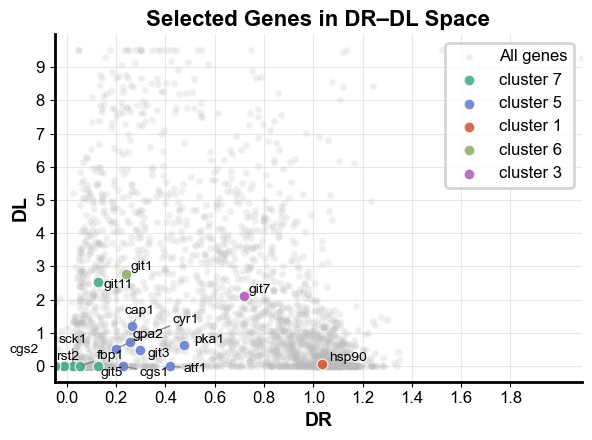

In [41]:
# DR–DL scatter with annotations (DR=um, DL=lam)

colors7 = [
    "#cd5d39",
    "#d27b90",
    "#b460bd",
    "#b49041",
    "#6980ce",
    "#91ad6d",
    "#4aac8d",
]

fig, ax = plt.subplots(1, 1, figsize=FIGURE_SIZES['medium'])

# Background: all genes in light gray for context
ax.scatter(df['um'], df['lam'], s=12, alpha=0.15, color='#bbbbbb', label='All genes')

# Selected genes: colored points
# Track which clusters we've already labeled for the legend
labeled_clusters = set()
for _, r in sel.iterrows():
    cluster_num = r["revised_cluster"]
    label = f'cluster {cluster_num}' if cluster_num not in labeled_clusters else None
    if cluster_num not in labeled_clusters:
        labeled_clusters.add(cluster_num)
    ax.scatter(r['um'], r['lam'], s=60, alpha=0.9, color=colors7[cluster_num-1], edgecolors='white', linewidths=0.8, label=label)

# Non-overlapping annotations with leader lines
texts = []

from adjustText import adjust_text
for _, r in sel.iterrows():
    txt = ax.text(r['um'], r['lam'], r['GeneLabel'], fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.15', fc='none', ec='none', alpha=0.9), zorder=3)
    texts.append(txt)
adjust_text(
    texts,
    x=sel['um'].values,
    y=sel['lam'].values,
    ax=ax,
    only_move={'points':'y', 'texts':'xy'},
    arrowprops=dict(arrowstyle='-', color='gray', alpha=0.9, lw=1)
)

ax.set_xlabel('DR')
ax.set_ylabel('DL')
ax.set_title('Selected Genes in DR–DL Space')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', frameon=True, scatterpoints=1)

# Axis tuning to match clustering notebook style
ax.set_xticks(np.arange(0, 2.0, 0.2))
ax.set_xlim(-0.05, max(1.5, df['um'].max()))
ax.set_yticks(np.arange(0, 10, 1))

plt.tight_layout()
plt.show()
plt.close()
# save_plot(fig, output_folder / 'selected_genes_drdl')


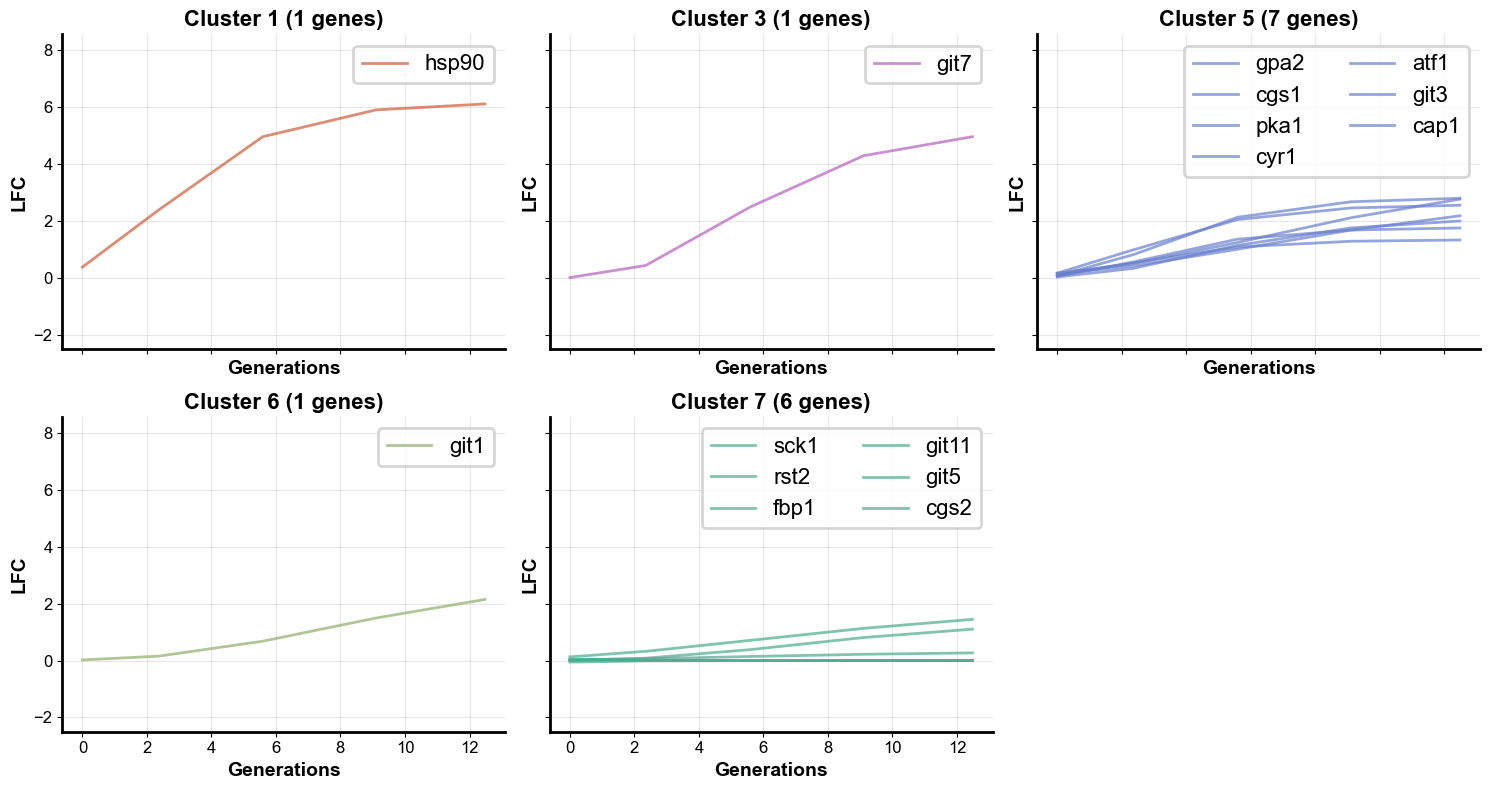

In [45]:
# Depletion curves for selected genes grouped by cluster

time_points = [0.0, 2.352, 5.588, 9.104, 12.48]
value_cols = ['t0_fitted', 't1_fitted', 't2_fitted', 't3_fitted', 't4_fitted']

# Group genes by cluster
clusters = sel['revised_cluster'].unique()
n_clusters = len(clusters)
cols = 3
rows = (n_clusters + cols - 1) // cols if n_clusters > 0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)
if rows == 1:
    axes = np.array(axes).reshape(1, -1)

for i, cluster_num in enumerate(sorted(clusters)):
    r, c = divmod(i, cols)
    ax = axes[r, c]
    
    # Get all genes in this cluster
    cluster_genes = sel[sel['revised_cluster'] == cluster_num]
    
    # Plot each gene in the cluster
    for _, gene in cluster_genes.iterrows():
        values = [gene[col] for col in value_cols]
        ax.plot(time_points, values, color=colors7[cluster_num-1], linewidth=2.0, alpha=0.7, label=gene['GeneLabel'])
    
    ax.set_title(f"Cluster {cluster_num} ({len(cluster_genes)} genes)")
    ax.set_xlabel('Generations')
    ax.set_ylabel('LFC')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(min(-2.5, np.nanmin(df[value_cols].values)), max(2.5, np.nanmax(df[value_cols].values)))
    ax.legend(fontsize=16, loc='best', frameon=True, ncol=2)

# Remove empty subplots
for j in range(n_clusters, rows*cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()
plt.close()
# save_plot(fig, output_folder / 'selected_genes_depletion_curves_by_cluster')
